In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterworkflow.data import get_fremont_data
import pandas as pd
from sklearn import preprocessing 

import numpy as np

# Load data

In [2]:
!head Fremont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [3]:
# download if necessary and load data
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


## plot data

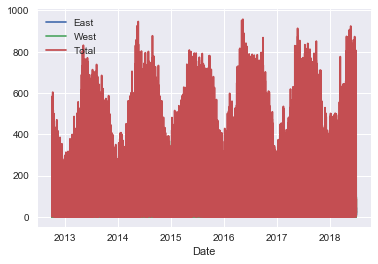

In [4]:
data.plot();

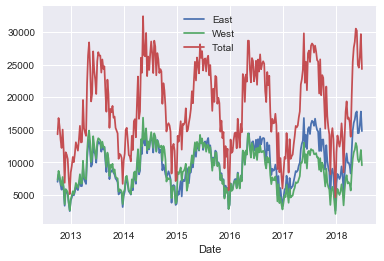

In [15]:
data.resample('W').sum().plot();

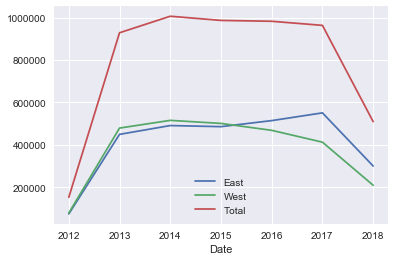

In [16]:
data.resample('Y').sum().plot();

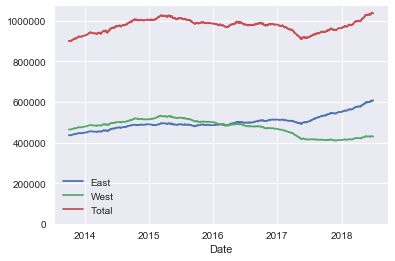

In [17]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

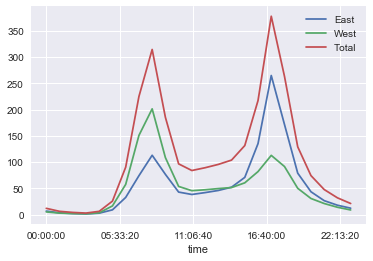

In [18]:
data.groupby(data.index.time).mean().plot();

In [19]:
# This can also be done as day of week in index and different weeks for columns

# this is hour in the index and days in the columns, gives the traffic flow for each hour of the day 
pivoted_table = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted_table.head()

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2018-06-21,2018-06-22,2018-06-23,2018-06-24,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-06-30
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,21.0,23.0,9.0,19.0,6.0,21.0,11.0,11.0,9.0,45.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,7.0,13.0,7.0,8.0,4.0,2.0,3.0,1.0,6.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,3.0,8.0,4.0,5.0,3.0,3.0,3.0,1.0,6.0,6.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,4.0,5.0,5.0,4.0,3.0,2.0,5.0,4.0,4.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,9.0,12.0,8.0,6.0,8.0,13.0,22.0,10.0,11.0,5.0


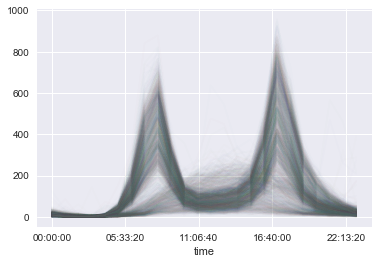

In [150]:
pivoted_table.plot(legend = False, alpha = 0.01)

 # Refactored code

In [151]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

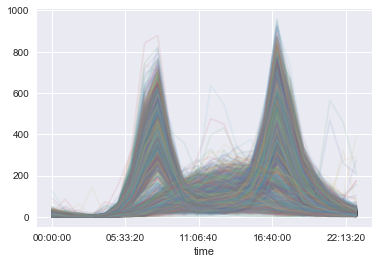

In [152]:
pivoted.plot(legend=False, alpha = 0.1);

In [153]:
pivoted.T.shape
# this yields 2097 observations for hour of the day 

(2097, 24)

In [154]:
from sklearn.decomposition import PCA
PCA(2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [155]:
X = pivoted.fillna(0).T.values

In [156]:
X.shape

(2097, 24)

In [157]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [158]:
import sklearn
sklearn.__version__

'0.19.2'

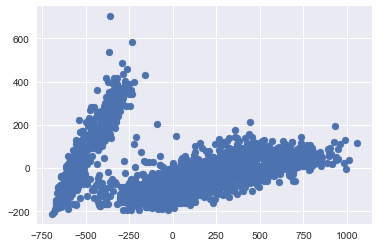

In [159]:
plt.scatter(X2[:, 0], X2[:, 1]);

In [160]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 0])

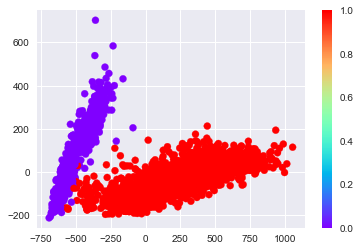

In [161]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap='rainbow');
plt.colorbar()

In [162]:
len(labels)

2097

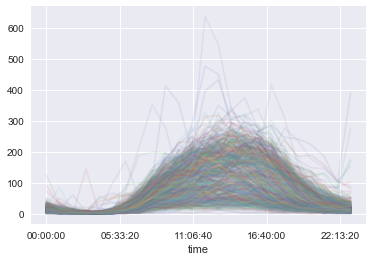

In [33]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==0].T.plot(legend=False, alpha = 0.1);

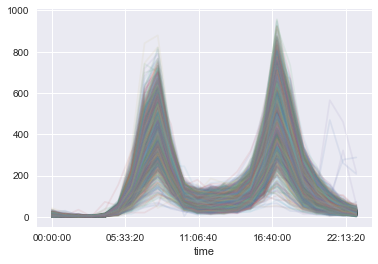

In [34]:
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

In [35]:
# want to see what day of week these graphs represnent 
pivoted.columns

Index([2012-10-03, 2012-10-04, 2012-10-05, 2012-10-06, 2012-10-07, 2012-10-08,
       2012-10-09, 2012-10-10, 2012-10-11, 2012-10-12,
       ...
       2018-06-21, 2018-06-22, 2018-06-23, 2018-06-24, 2018-06-25, 2018-06-26,
       2018-06-27, 2018-06-28, 2018-06-29, 2018-06-30],
      dtype='object', length=2097)

In [36]:
pd.DatetimeIndex(pivoted.columns).dayofweek

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
           dtype='int64', length=2097)

In [37]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

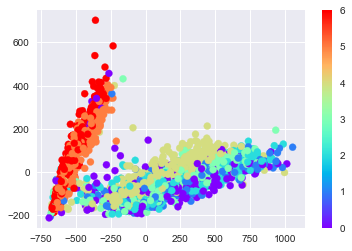

In [38]:
plt.scatter(X2[:, 0], X2[:, 1], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [39]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dates.dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', length=1448, freq=None)

# Look at blog post on this analysis as well

# Can look at days with smallest granularity and week as columns in dataframe. 

# Full PCA analysis, solving for multiples axes, up to 7 for 7 days of the week 

can solve for the smallest number between observations or variables 

In [40]:
# create PCA object
pca= PCA()

In [278]:
# need to center and scale the data 
# the data also needs to be transposed. The columns or varibales become the rows for PCA loading scores
# only scale data if it's not on the same scale 
# https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio#105649
scaled_data = X

In [279]:
# calculate loading scores and variation each principle compenent acount for 
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [280]:
# generate coordinates based on loading scores and scaled data
pca_data = pca.transform(scaled_data)

In [281]:
# scree plot
# generate percentage that each PCA accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
# generate labels for scree plot
labels = ['PC' + str(num) for num in range(1, len(per_var) + 1)]

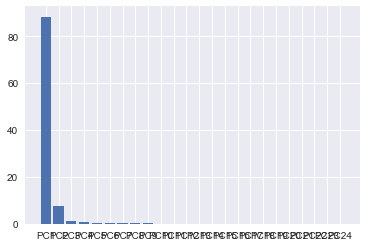

In [282]:
plt.bar(left=range(1, len(per_var) + 1), height = per_var, tick_label=labels)
plt.show()

In [283]:
X.shape

(2097, 24)

In [284]:
# generate df with pca coordinates, variables are presented as rows, thus the index should be variable names, the columns represent the different PCA axis 
pca_df = pd.DataFrame(pca_data, index = pivoted.T.index.values,columns=labels)

In [285]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
2012-10-03,321.515585,-6.437445,33.185113,-42.463394,-27.003659,9.279978,-4.787134,-6.425587,69.503363,-13.209911,...,-14.451548,-12.767246,-9.008426,5.884767,1.254553,-10.274363,4.080125,2.121008,0.181511,-2.292806
2012-10-04,244.669825,36.937230,-8.713220,13.807525,-2.044362,-14.442802,-2.166135,10.959598,23.546671,-23.934117,...,8.625544,18.048230,9.847927,-3.491989,-1.229578,-10.086233,-3.626230,0.395211,3.800169,3.960224
2012-10-05,143.182600,43.372019,58.455542,-9.073639,2.005193,-12.285036,-37.840871,-14.755705,19.415111,-41.801259,...,2.499522,-10.125954,10.511698,-0.160683,-3.396908,-3.111586,3.044388,0.510220,3.604478,1.751471
2012-10-06,-385.225341,200.187936,33.179752,-27.722519,-20.096787,16.097535,0.811238,18.443373,2.629226,31.832409,...,-12.680644,6.311044,8.807297,1.336062,-2.548646,-3.358313,6.313408,-1.871261,0.935970,0.689973
2012-10-07,-388.685498,284.531388,41.236889,-62.072866,-25.867568,-10.877553,0.913485,23.850066,8.069663,4.154026,...,18.827508,-4.744944,-13.568791,-8.492118,-2.304977,1.801320,8.470560,-0.365330,-3.005324,-4.556142


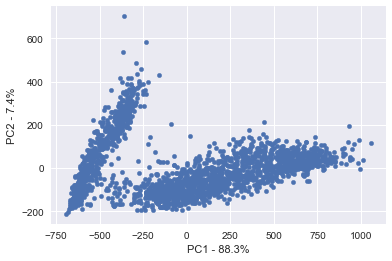

In [286]:
# plot pc1 versus pc2
pca_df.plot(kind='scatter', x='PC1', y='PC2')
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

# plot labels
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df['PC1'][sample]+.2,  pca_df['PC2'][sample]))

In [287]:
# let's look at the loading score for PC1 to see which ones had the largest influence on separating the two clusters along the x axis
# series object from loading scores in PC1
# top 10 by absolute value, capturing index 
loading_scores = pd.DataFrame(pca.components_[0], index = pivoted.index.values)
sorted_loading_scores = loading_scores.abs().sort_values( by = [0],ascending=False)
top_ten_genes = sorted_loading_scores[0:10].index
loading_scores[loading_scores.index.isin(top_ten_genes)].sort_values(by=0,ascending=False)

,0
17:00:00,0.556408
08:00:00,0.481108
18:00:00,0.379190
07:00:00,0.376641
16:00:00,0.236783
09:00:00,0.210663
19:00:00,0.178999
06:00:00,0.142519
20:00:00,0.096045
15:00:00,0.061664


In [288]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek

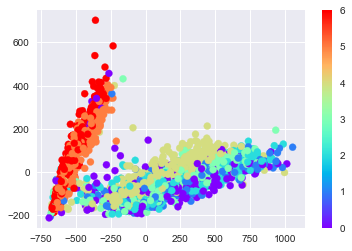

In [289]:
plt.scatter(pca_df['PC1'],pca_df['PC2'], c = day_of_week, cmap='rainbow');
plt.colorbar();

In [306]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)
labels

array([0, 0, 0, ..., 0, 0, 1])

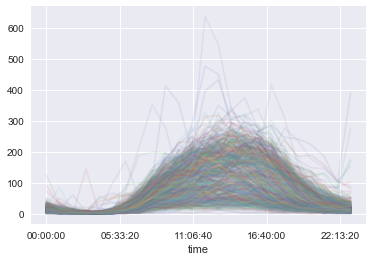

In [317]:
# filters the columns with labels of array of 0s and 1s
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.1);

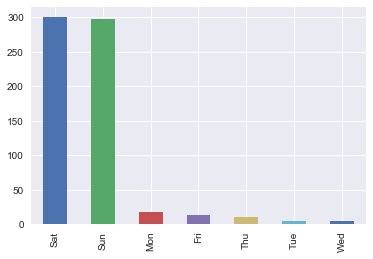

In [308]:
# Isolates weekdays
pd.Series(pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')).value_counts().plot(kind='bar');

In [313]:
# Sundays that behave like weekdays
Sun_index  = pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')=='Sun'
pd.DatetimeIndex(pivoted.T[labels==0].index)[Sun_index]

DatetimeIndex(['2015-09-13', '2018-04-08'], dtype='datetime64[ns]', freq=None)

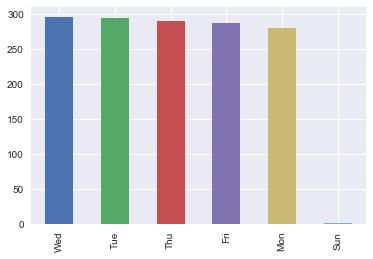

In [314]:
# isolate weekends
pd.Series(pd.DatetimeIndex(pivoted.T[labels==0].index).strftime('%a')).value_counts().plot(kind='bar');

In [315]:
# Solve for Tue
Tue_index  = pd.DatetimeIndex(pivoted.T[labels==1].index).strftime('%a')=='Tue'

In [316]:
# All Tuesdays that behave like Weekends 
pd.DatetimeIndex(pivoted.T[labels==1].index)[Tue_index]

DatetimeIndex(['2012-12-25', '2013-01-01', '2013-12-24', '2017-07-04',
               '2017-12-26'],
              dtype='datetime64[ns]', freq=None)

# If days behave differently then subtract them break them out into separate analysis for predicting. 

# Probability density 

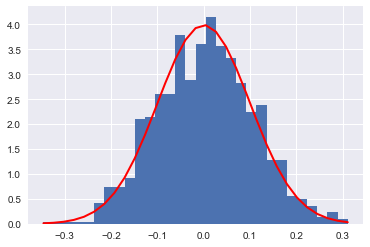

In [15]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

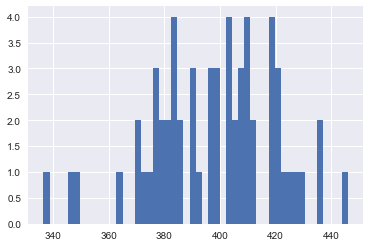

In [766]:
# a  distribution with centered around 100 +-5
mu = 400
sigma = 20
installs = np.random.normal(mu, sigma, 60)
count, bins, ignored = plt.hist(installs, 50)

In [767]:
date = pd.date_range('1/1/2018', periods=60, freq='d')

In [768]:
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
               '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
               '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
               '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
               '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
      

In [769]:
df = pd.DataFrame({'installs':installs}, index = date)

In [770]:
df.head()

,installs
2018-01-01,374.962498
2018-01-02,384.829494
2018-01-03,408.170054
2018-01-04,421.157824
2018-01-05,406.703365


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1295e8080>]],
      dtype=object)

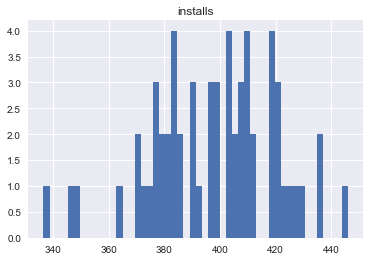

In [771]:
df.hist(bins=50)

In [772]:
df['uplift'] = 0
df.loc['2018-02-01':'2018-02-07','uplift'] =100
df['total']  = df.sum(axis=1)
df.drop(columns='uplift', inplace=True)

(0, 539.3799296726189)

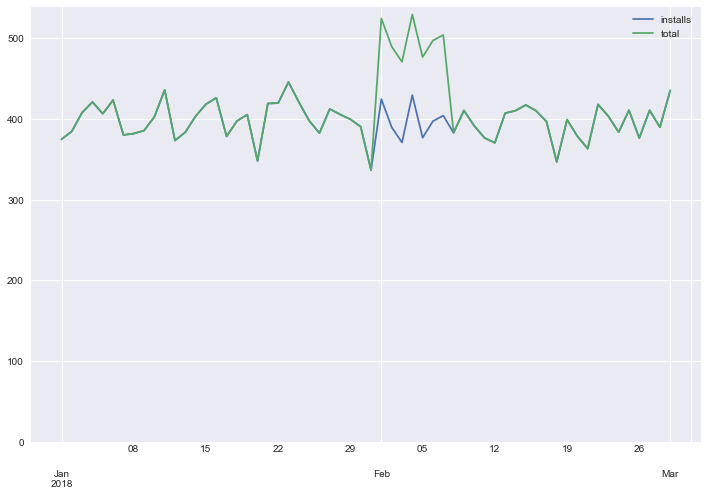

In [773]:
df.plot(figsize=(12,8));
plt.ylim(0,None)

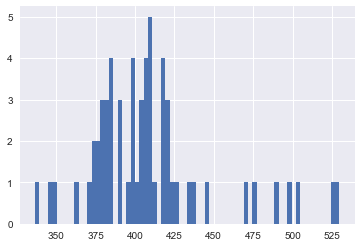

In [774]:
df['total'].hist(bins=70);

In [775]:
# now apply gmm to totals and try to separate installs from uplift 
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM
gmm = GaussianMixture(2)
gmm.fit(df['total'].values.reshape(-1, 1))
labels = gmm.predict(df['total'].values.reshape(-1, 1))
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [776]:
len(labels)==len(df['total'])

True

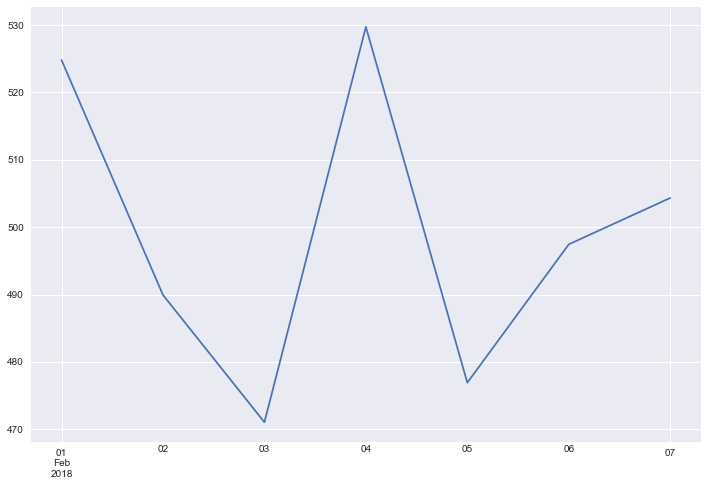

In [777]:
df[  labels==1]['total'].plot(figsize=(12,8));

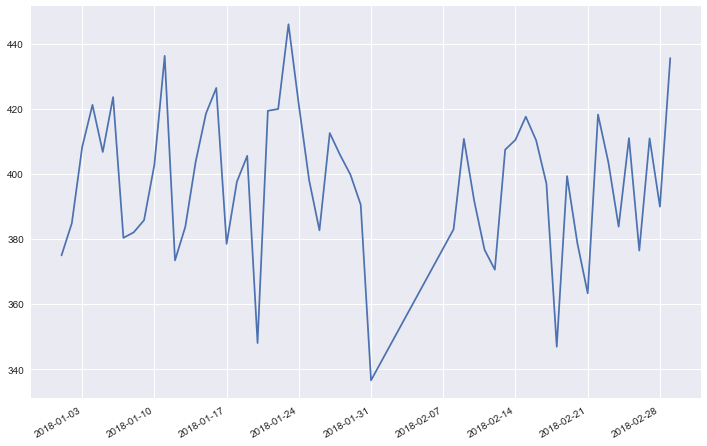

In [778]:
df[  labels==0]['total'].plot(figsize=(12,8));

In [779]:
featuring_dates =  df.loc['2018-02-01':'2018-02-07'].index

In [780]:
len(featuring_dates)

7

In [781]:
# total index length
len(df)

60

In [782]:
# dates not captured 
len(set(featuring_dates) - set(df[  labels==1]['total'].index))

0

In [783]:

len(set(featuring_dates) - set(df[  labels==0]['total'].index))

7

In [784]:
len(set(df[  labels==1]['total'].index))

7

In [785]:
len(set(df[  labels==0]['total'].index))

53

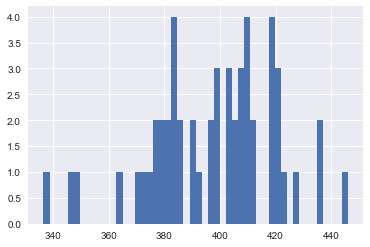

In [786]:
df[  labels==0]['total'].hist(bins=50)

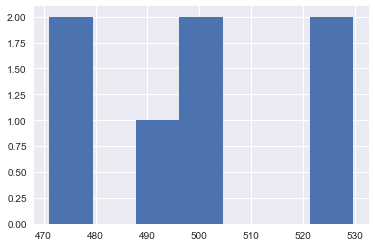

In [787]:
df[  labels==1]['total'].hist(bins=7)

In [788]:
# extra volume 
df[  labels==1]['total'].sum()

3494.1941132328866

In [789]:
estimated_dates = df[  labels==1].index
perc_error = len(set(estimated_dates)^set(featuring_dates))/ len(featuring_dates)
print('Percentage of days guessed correctly {:.0%}'.format(1-perc_error))

Percentage of days guessed correctly 100%


In [790]:
(df[df.index.isin(featuring_dates)]['total'] - df[df.index.isin(featuring_dates)]['installs'] )

2018-02-01    100.0
2018-02-02    100.0
2018-02-03    100.0
2018-02-04    100.0
2018-02-05    100.0
2018-02-06    100.0
2018-02-07    100.0
Freq: D, dtype: float64

In [791]:
(df[df.index.isin(featuring_dates)]['total'] - df[df.index.isin(featuring_dates)]['installs'] ).sum()

700.0

# plot cascading curves

In [571]:
means = np.arange(10,60,10)
sigma   = 7
means_dict = { }
for item in means: 
    means_dict[item] = np.random.normal(item, sigma, 365)

df = pd.DataFrame(means_dict )

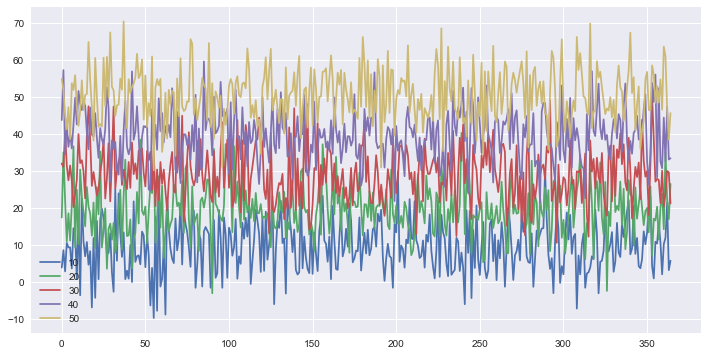

In [572]:
df.plot(figsize=(12,6));

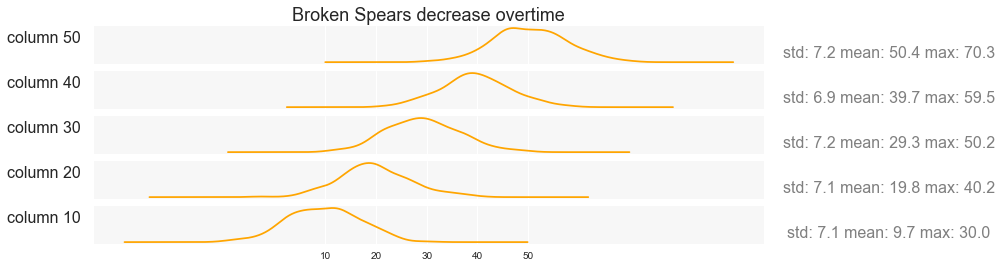

In [583]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(12,4))
title = 'Broken Spears decrease overtime'
for column, axess in zip(df.columns[::-1],(ax1, ax2,ax3, ax4, ax5)):
    df[column].plot( kind = 'density',ax = axess, color='orange' )
    axess.set_ylabel('column ' + str(column), rotation=0, labelpad =50, fontsize=16)
    axess.get_yaxis().set_ticks([])
    axess.set_xticks(means)
    axess.set_facecolor('.97')
    
    axess2 = axess.twinx()
    std = round(df[column].std(),1)
    local_low = round(df[column].min(),1)
    local_max = round(df[column].max(),1)
    local_mean = round(df[column].mean(),1)
    right_string = 'std: {std} mean: {local_mean} max: {local_max}'.format(std=std, local_mean=local_mean,  local_max=local_max)
    axess2.set_ylabel(right_string, rotation=0, labelpad = 125, fontsize=16, color ='gray')
    axess2.get_yaxis().set_ticks([])
ax1.set_title(title, fontsize=18);
    
#fig.tight_layout()

